# Hands-on with Python + matplotlib

*What is wrong with this figure?* 

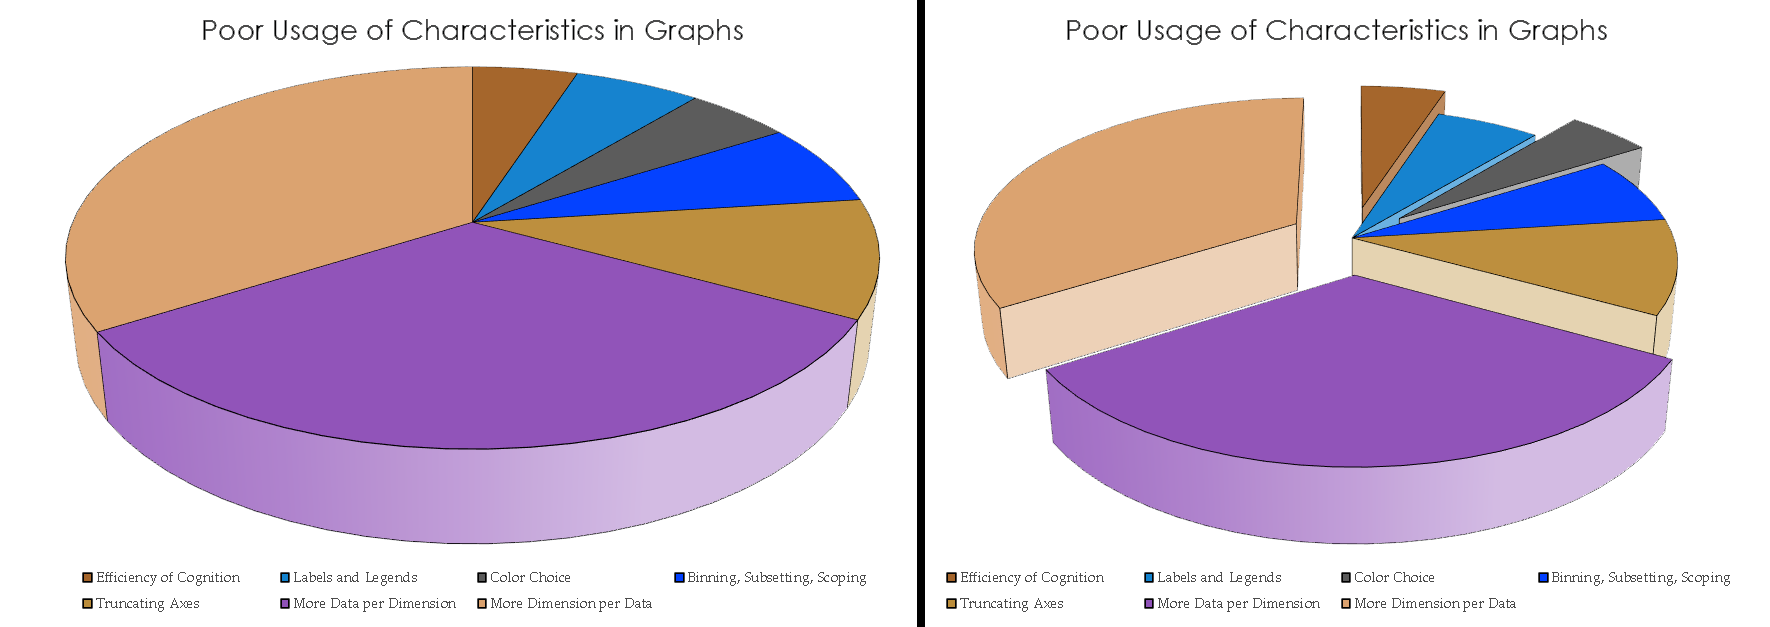

## Let's agree that this is a monstrosity.  Now, how do we improve it?

In [1]:
import numpy as np
import pandas as pd
import matplotlib
from matplotlib import pyplot as plt

%matplotlib inline

## 1. Read in the data

*I'm using pandas.*

In [2]:
url = 'https://raw.githubusercontent.com/ageller/IDEAS_FSS-Vis/master/matplotlib/bar/bar.csv'
data = pd.read_csv(url)
data


,Label,Value
0,Encoding Visual Meaning,10.0
1,Truncating Axes,3.0
2,Data to Ink Ratio,9.5
3,Efficiency of Cognition,9.0
4,"Binning, Subsetting, Scoping",5.0
5,More Dimension per Data,0.1
6,Accurate Geometry,10.0
7,Color Choice,7.0
8,Labels and Legends,8.0
9,More Data per Dimension,2.0


## 2. Pie charts are generally just bad.  Let's use a bar chart instead.

*Here is the default bar chart from python.  Leaves lots to be desired...*

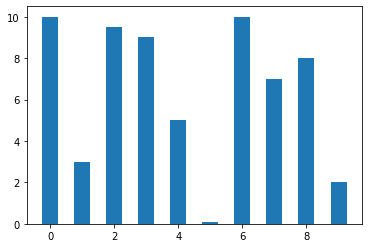

In [3]:
f,ax = plt.subplots()

ind = np.arange(len(data))  # the x locations for the bars
width = 0.5 # the width of the bars
rects = ax.bar(ind, data['Value'], width)

## 3. Add some labels

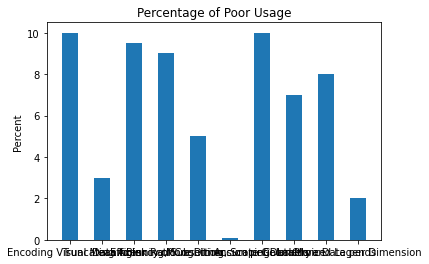

In [4]:
f,ax = plt.subplots()

ind = np.arange(len(data))  # the x locations for the bars
width = 0.5 # the width of the bars
rects = ax.bar(ind, data['Value'], width)

# add some text for labels, title and axes ticks
ax.set_ylabel('Percent')
ax.set_title('Percentage of Poor Usage')
ax.set_xticks(ind)
_ = ax.set_xticklabels(data['Label'])

## 4. Sort the data, and add the percentage values to each bar


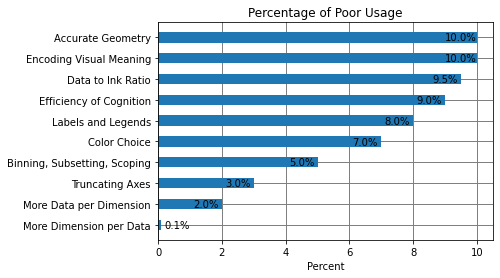

In [5]:
f,ax = plt.subplots()

#sort the data (nice aspect of pandas dataFrames)
data.sort_values('Value', inplace=True)

ind = np.arange(len(data))  # the x locations for the bars
width = 0.5 # the width of the bars
rects = ax.barh(ind, data['Value'], width, zorder=2)

# add some text for labels, title and axes ticks
ax.set_xlabel('Percent')
ax.set_title('Percentage of Poor Usage')
ax.set_yticks(ind)
ax.set_yticklabels(data['Label'])

#add a grid behind the plot
ax.grid(color='gray', linestyle='-', linewidth=1, zorder = 1)

#I grabbed this from here : https://matplotlib.org/examples/api/barchart_demo.html
#and tweaked it slightly 
for r in rects:
    h = r.get_height()
    w = r.get_width()
    y = r.get_y()
    if (w > 1):
        x = w - 0.5
    else:
        x = w + 0.5
    ax.text(x, y ,'%.1f%%' % w, ha='center', va='bottom', zorder = 3) 
        

## 5. Clean this up a bit
* I don't want the grid lines anymore
* Make the font larger
* Let's change the colors, and highlight one of them
* Save the plot

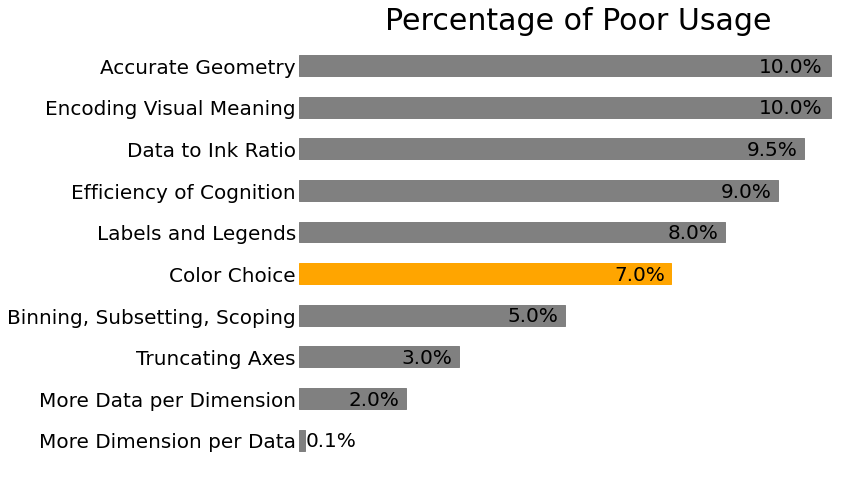

In [6]:
#this will change the font globally, but you could also change the fontsize for each label independently
font = {'size' : 20}
matplotlib.rc('font', **font) 

f,ax = plt.subplots(figsize=(10,8))

#sort the data (nice aspect of pandas dataFrames)
data.sort_values('Value', inplace=True)

ind = np.arange(len(data))  # the x locations for the bars
width = 0.5 # the width of the bars
rects = ax.barh(ind, data['Value'], width, zorder=2)

# add some text for labels, title and axes ticks
ax.set_title('Percentage of Poor Usage', fontsize = 30)
ax.set_yticks(ind)
ax.set_yticklabels(data['Label'])

#remove all the axes, ticks and lower x label
aoff = ['right', 'left', 'top', 'bottom']
for x in aoff:
    ax.spines[x].set_visible(False)
ax.tick_params(length=0)
ax.set_xticklabels([' ']*len(data))


#I grabbed this from here : https://matplotlib.org/examples/api/barchart_demo.html
#and tweaked it slightly 
highlight = [4]
for i, r in enumerate(rects):
    h = r.get_height()
    w = r.get_width()
    y = r.get_y()
    if (w >= 10):
        x = w - 0.75
    elif (w > 1):
        x = w - 0.6
    else:
        x = w + 0.5
    r.set_color('gray')
    if (i in highlight):
        r.set_color('orange')
    ax.text(x, y ,'%.1f%%' % w, ha='center', va='bottom', zorder = 3) 

    
#f.savefig('bar.pdf',format='pdf', bbox_inches = 'tight') 
